<a href="https://colab.research.google.com/github/cleitonmoya/MAE001_Trabalho2/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto \#2  - MAE001

Alunos:
* Cleiton Moya de Almeida
* Gustaco Maciel Ribeiro
* Renato Santana


## Introdução

## Preliminar - Importações

Bibliotecas utilizados neste trabalho:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importação da séries financeiras utilizadas nas questões 2, 3 e 4:

In [2]:
dir = 'https://raw.githubusercontent.com/cleitonmoya/MAE001_Trabalho2/main/series/'
series = ['ibov', 'bbdc4', 'itub4', 'csna3', 'b3sa3', 'ggbr4',
          'petr4', 'mglu3', 'abev3', 'wege3', 'vivt4']
url = dir + 'ibov'.upper() + '.csv'

# Cria primeiro um dataframe somente com os ibov
df = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data', 'Fechamento'], header=0)
df.columns=['ibov']

# carrega as demais séries para o dataframe
for _,ativo in enumerate(series):
  url = dir + ativo.upper() + '.csv'
  df[ativo] = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data','Fechamento'])

# Ordena o dataframe por data crescente (a fim de permitir correta localização)
df.sort_index(inplace=True) 
df = df.loc['2019-09-01':'2020-01-31'] # período analisado

Visualizando as séries importadas:

In [3]:
df.head()

,ibov,bbdc4,itub4,csna3,b3sa3,ggbr4,petr4,mglu3,abev3,wege3,vivt4
Data,,,,,,,,,,,
2019-09-02,100625.74,28.06,32.27,14.04,41.99,12.60,24.87,9.12,17.98,22.56,50.98
2019-09-03,99680.83,27.60,31.65,13.63,41.81,12.52,25.16,8.94,18.12,21.98,50.73
2019-09-04,101200.89,27.94,31.87,13.81,42.65,12.52,25.81,9.27,18.39,22.41,51.61
2019-09-05,102243.00,28.59,32.78,13.94,43.29,12.61,25.94,9.14,18.28,22.56,52.21
2019-09-06,102935.43,29.79,33.88,13.76,43.86,12.38,26.07,8.97,18.31,22.62,51.28


## Questão 1

## Questão 2

* Setor Financeiro:
   * Banco Bradesco (BBDC4);
   * Banco Itaú-Unibanco (ITUB4);
* Setor de Siderurgia:
   * Companhia Siderúrigica Nacional (CSNA3)
   * Grupo Gerdau (GGBR4)
 


Análise de correlação das ações com o IBOV:

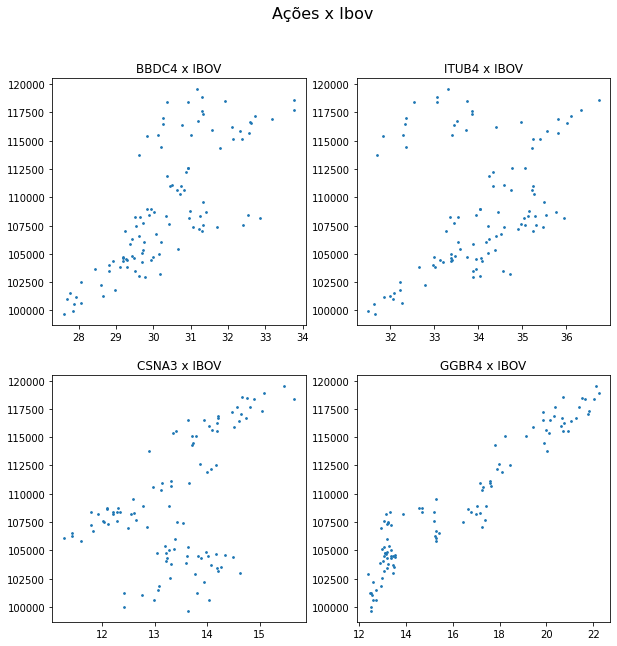

In [49]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0,0].set_title('BBDC4 x IBOV')
axs[0,0].scatter(df.bbdc4, df.ibov, s=3)

axs[0,1].set_title('ITUB4 x IBOV')
axs[0,1].scatter(df.itub4, df.ibov, s=3)

axs[1,0].set_title('CSNA3 x IBOV')
axs[1,0].scatter(df.csna3, df.ibov, s=3)

axs[1,1].set_title('GGBR4 x IBOV')
axs[1,1].scatter(df.ggbr4, df.ibov, s=3)
plt.show()

Ativos ativos do mesmo setor:

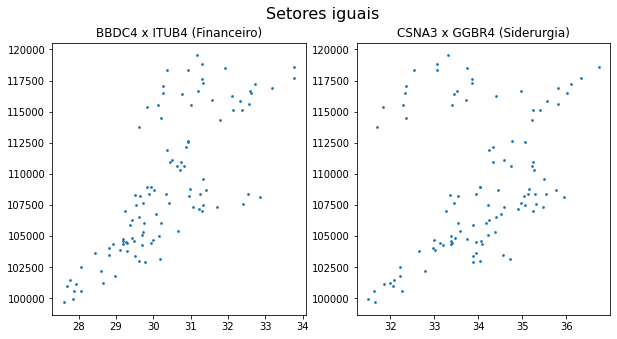

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Setores iguais', fontsize=16)
axs[0].set_title('BBDC4 x ITUB4 (Financeiro)')
axs[0].scatter(df.bbdc4, df.ibov, s=3)

axs[1].set_title('CSNA3 x GGBR4 (Siderurgia)')
axs[1].scatter(df.itub4, df.ibov, s=3)
plt.show()

Análise de correlação entre as ações:

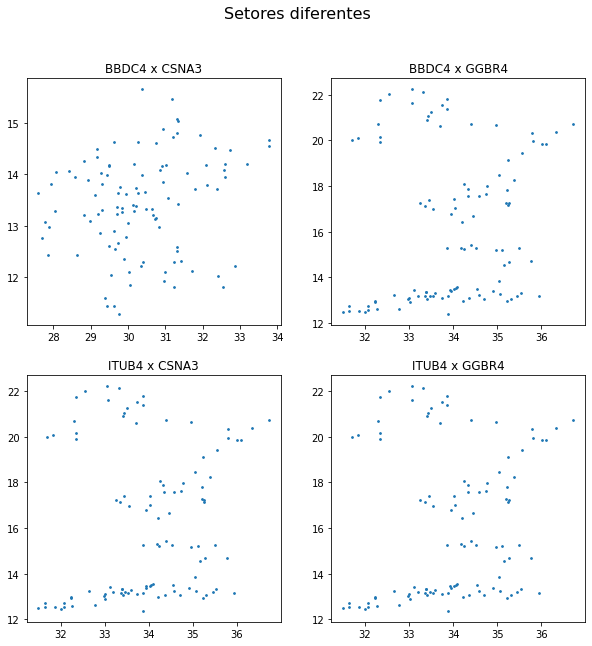

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Setores diferentes', fontsize=16)
axs[0,0].set_title('BBDC4 x CSNA3')
axs[0,0].scatter(df.bbdc4, df.csna3, s=3)
axs[0,1].set_title('BBDC4 x GGBR4')
axs[0,1].scatter(df.itub4, df.ggbr4, s=3)
axs[1,0].set_title('ITUB4 x CSNA3')
axs[1,0].scatter(df.itub4, df.ggbr4, s=3)
axs[1,1].set_title('ITUB4 x GGBR4')
axs[1,1].scatter(df.itub4, df.ggbr4, s=3)
plt.show()

Matriz de convariância dos ativos:

In [78]:
X = np.array([df.ibov, df.bbdc4, df.itub4, df.csna3, df.ggbr4])
M_cov = np.cov(X)
np.set_printoptions(precision=3)
print(M-cov)

[[ 3.025e+07  5.696e+03  2.250e+03  2.402e+03  1.688e+04]
 [ 5.696e+03  1.879e+00  1.278e+00  2.380e-01  2.492e+00]
 [ 2.250e+03  1.278e+00  1.471e+00 -1.217e-01  5.508e-01]
 [ 2.402e+03  2.380e-01 -1.217e-01  9.284e-01  1.491e+00]
 [ 1.688e+04  2.492e+00  5.508e-01  1.491e+00  1.042e+01]]


Podemos melhor visualizar através da matriz de correlação:

In [79]:
M_cor = np.corrcoef(X)
print(M_cor)

[[ 1.     0.755  0.337  0.453  0.951]
 [ 0.755  1.     0.769  0.18   0.563]
 [ 0.337  0.769  1.    -0.104  0.141]
 [ 0.453  0.18  -0.104  1.     0.479]
 [ 0.951  0.563  0.141  0.479  1.   ]]


## Questão 3

## Questão 4